#### El jugador que más puntos obtuvo en promedio :
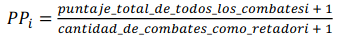

Solo aplicamos ese +1 en el caso especifico en que el jugador no haya retado a nadie.


Similar al anterior

1. El primer job se encarga de contabilizar para cada jugador el total de puntos. De modo que haciendo uso del mapper escribimos, los retores son los que por la estructura del dataset ganan puntos pero puede haber jugadores que fueron retados pero no retadores, el retador junto a los puntos y el retado junto a 0 puntos y 0 aparición como retador. Un combiner con la misma función que el reducer para reducir los datos enviados entre clusters que calculan la sumatoria y la escriben. 

Aqui una decision de diseño. se podria hacer que el job uno calcule el promedio pero decidimos cederle la tarea al segundo para tener además los datos intermedios.

2. El segundo calcula el promedio, fase map, y en su reducer saca el máximo.

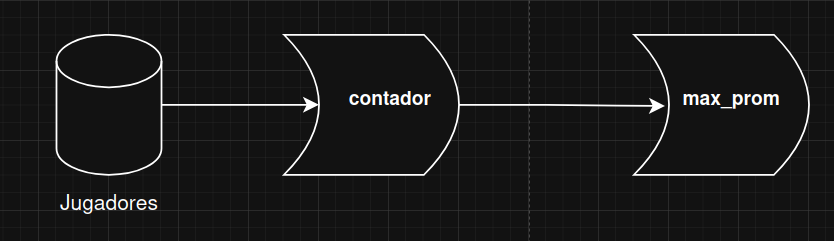

# Primer Job

In [5]:
from MRE import Job
inputDir = "./jugadores/"
outputDir = "./contabilizado/"

In [6]:
def fmap(key, value, context):
    lista = value.split()
    puntos = int(lista[1])
    context.write(key, (puntos,1))
    context.write(lista[0], (0,0))

def fcombiner(key, values, context):
    s = 0
    c = 0
    for v in values:
        s += int(v[0])
        c += int(v[1])
    context.write(key, [s, c])

def fred(key, values, context):
    s = 0
    c = 0
    for v in values:
        s += int(v[0])
        c += int(v[1])
    context.write(key, (s, c))

jobCount = Job(inputDir, outputDir, fmap, fred)
jobCount.setCombiner(fcombiner)
success = jobCount.waitForCompletion()

print(success)

True


# Segundo job 
que calcula el promedio y el maximo

In [7]:
inputDir = "./contabilizado/"
outputDir = "./out/"

In [ ]:
def fmap(key, value, context):
    lista = value.split()
    if lista[0] == '0' and lista[1] == '0':
        promedio = 1/1
    else: 
        promedio = (int(lista[0]) + 1 )/(int(lista[1]) + 1)
    context.write(1, (key, promedio))

def fred(key, values, context):
    maximo = -1
    clave = 0
    for v in values:
        if v[1] > maximo:
            maximo = v[1]
            clave = v[0]
    context.write(clave, maximo)

jobMaxProm = Job(inputDir, outputDir, fmap, fred)
success = jobMaxProm.waitForCompletion()

print(success)

True
